In [1]:
# Import PyTorch
import torch
from odbc import dataError
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

#Summary model
from torchsummary import summary as summary_model
from tqdm import tqdm

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 'Could not find module 'C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


PyTorch version: 2.1.0+cpu
torchvision version: 0.15.2+cu118


In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

In [4]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
# How many samples are there? 
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [6]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


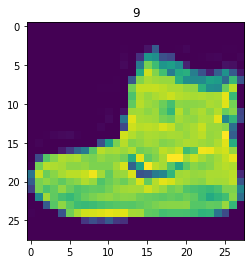

In [7]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

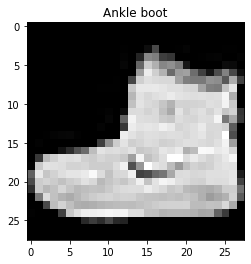

In [8]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

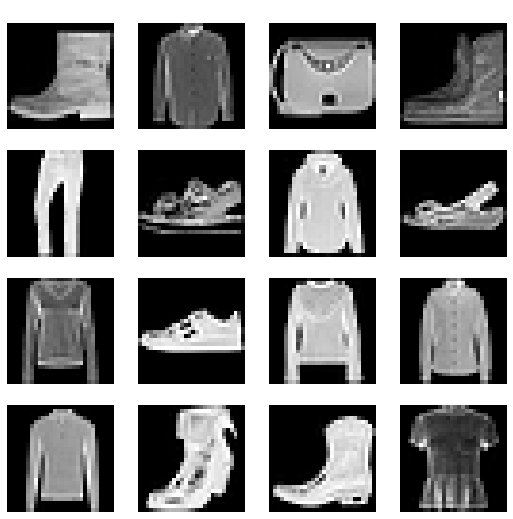

In [9]:
# plot more image
torch.manual_seed(42)
fig = plt.figure(figsize=[9, 9])
rows = cols = 4
for i in range(1, rows*cols+1):
    rad_idx = torch.randint(0, len(train_data), [1]).item()
    img, label = train_data[rad_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label], color='#ffffff')
    plt.axis(False)

## Create DataLoader

In [10]:
from torch.utils.data import DataLoader

In [11]:
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)
# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000025510E1F2E0>, <torch.utils.data.dataloader.DataLoader object at 0x0000025510E1F7F0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [12]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


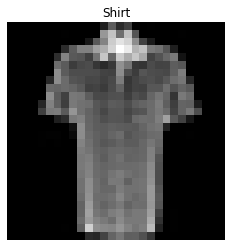

In [13]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off")
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [14]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# Try uncommenting below and see what happens
#print(x)
#print(output)

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


## Build 

In [15]:
from torch import nn

In [16]:
class ModelV0(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int ):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self,x):
        return self.layer_stack(x)

In [17]:
torch.manual_seed(42)
model_0 = ModelV0(input_shape=784, hidden_units=16, output_shape=10)
model_0.to('cpu')

ModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=10, bias=True)
  )
)

## Setup loss, optimizer and evaluation metrics

In [18]:
from helper_functions import *

In [19]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### Create a function to time our experiments

In [20]:
from timeit import default_timer as timer
def print_train_time(start:float, end:float, device:torch.device):
    total_time =  end - start
    print(f'Train time on device: {device} : {total_time: .3f} seconds')
    
    return total_time

    

### Creating a training loop and training a model on batchs of data

In [21]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

In [22]:
torch.manual_seed(42)
train_time_start_on_cpu = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f'Epoch : {epoch}\n-------')
    
    # Training 
    train_loss = 0
    
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    test_loss, test_acc = 0, 0 
    # Testing 
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = model_0(X)
            
            loss = loss_fn(test_pred, y)
            test_loss += loss
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
            
            # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)
        print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,                                                                                        end=train_time_end_on_cpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.58506 | Test loss: 0.50618, Test acc: 82.24%

Epoch : 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47503 | Test loss: 0.48423, Test acc: 83.07%

Epoch : 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45409 | Test loss: 0.47700, Test acc: 83.41%

Train time on device: cpu :  36.203 seconds


### Making predictions with model version 0



In [23]:
torch.manual_seed(42)
def eval_model(
        model: nn.Module,
        data_loader: torch.utils.data.DataLoader,
        loss_fn: nn.Module,
        accuracy_fn):
    loss = acc = 0
    
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            y_pred = model(X)
            
            loss +=loss_fn(y_pred, y)
            acc += accuracy_fn(y, y_pred.argmax(dim=1))
            
            loss /= len(data_loader)
            acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}
model_0_result = eval_model(model_0, test_dataloader, loss_fn, accuracy_fn)
model_0_result

{'model_name': 'ModelV0',
 'model_loss': 0.001032336731441319,
 'model_acc': 0.30028917735831345}

## Build model with non-linear

In [24]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

### Functionizing training and test loops

In [25]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for X, y in data_loader:
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [26]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to('cpu') # send model to GPU if it's available
next(model_1.parameters()).device # check model device

device(type='cpu')

In [27]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.1)

#### Training Model_1(Model with non-linear)

In [28]:
torch.manual_seed(42)
from timeit import default_timer as timer
train_time_start_on_cpu = timer()

epochs = 3
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n---------")
    train_step(
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        data_loader=train_dataloader,
        device=torch.device('cpu'),
    )
    test_step(
        data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=torch.device('cpu'),
        
    )
train_time_end_on_cpu = timer()
total_train_time_model_1 = print_train_time(end=train_time_end_on_cpu,
                                            start=train_time_start_on_cpu,
                                            device=device)

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on device: cpu :  28.449 seconds


In [29]:
torch.manual_seed(42)

# Note: This will error due to `eval_model()` not using device agnostic code 
model_1_results = eval_model(model=model_1, 
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn) 
model_1_results 

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.0012777420924976468,
 'model_acc': 0.28032041221337156}

### Make a Evaluation Func for many devices

In [30]:
torch.manual_seed(42)
def eval_model(
        model: nn.Module,
        data_loader:  torch.utils.data.DataLoader,
        loss_fn: nn.Module,
        accuracy_fn,
        device: torch.device = device,):
    
    loss = acc = 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y, y_pred.argmax(dim=1))
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [31]:
 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [32]:
model_0_result

{'model_name': 'ModelV0',
 'model_loss': 0.001032336731441319,
 'model_acc': 0.30028917735831345}

## Build a convolutional neural network

In [33]:
class FashionModelV2(nn.Module):
    def __init__(self, input_shape, output_shape, hidden_units):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                padding=1,
                kernel_size=3,
                stride=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                padding=1,
                stride=1,
                kernel_size=3
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)

        ),
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, 1, 1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape
                      )
        )
    
    def forward(self, x):
        
        for i in range(len(self.block_1)):
            x = self.block_1[i](x)
        
        
        for i in range(len(self.block_2)):
            x = self.block_2[i](x)
        x = self.classifier(x)
        
        return x
torch.manual_seed(42)
model_2 = FashionModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model_2

FashionModelV2(
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [34]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [35]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG 
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here 

# Pass the data through the convolutional layer
conv_layer(test_image) # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input) 

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [36]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

In [37]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                             lr=0.1)

In [38]:
from timeit import default_timer
epochs = 5
start_time = default_timer()

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(
        data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(
        data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )
time_end = default_timer()
total_train_time_model_2 = print_train_time(start=start_time, end=time_end, device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.75681 | Train accuracy: 72.45%
Test loss: 0.55202 | Test accuracy: 80.15%

Epoch: 1
---------
Train loss: 0.47253 | Train accuracy: 83.03%
Test loss: 0.46389 | Test accuracy: 83.38%

Epoch: 2
---------
Train loss: 0.42215 | Train accuracy: 84.87%
Test loss: 0.42700 | Test accuracy: 84.56%

Epoch: 3
---------
Train loss: 0.38926 | Train accuracy: 86.02%
Test loss: 0.41004 | Test accuracy: 85.21%

Epoch: 4
---------
Train loss: 0.36804 | Train accuracy: 86.73%
Test loss: 0.39710 | Test accuracy: 85.79%

Train time on device: cpu :  130.009 seconds


In [39]:
# Get the result of mode 2
model_2_result = eval_model(model=model_2,
                            accuracy_fn=accuracy_fn,
                            loss_fn=loss_fn,
                            data_loader=test_dataloader,
                            device=device
                            )
model_2_result

{'model_name': 'FashionModelV2',
 'model_loss': 0.39709925651550293,
 'model_acc': 85.79273162939297}

### Compare model results and training time

In [40]:
import pandas as pd

data_frame = pd.DataFrame([model_0_result, model_1_results, model_2_result])
data_frame

,model_name,model_loss,model_acc
0,ModelV0,0.001032,0.300289
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionModelV2,0.397099,85.792732


In [44]:
data_frame['training_time'] = [
    total_train_time_model_0,
    total_train_time_model_1,
    total_train_time_model_2
]
data_frame

,model_name,model_loss,model_acc,training_time
0,ModelV0,0.001032,0.300289,36.203125
1,FashionMNISTModelV1,0.685001,75.019968,28.448924
2,FashionModelV2,0.397099,85.792732,130.009097


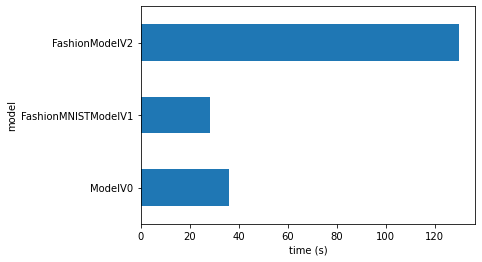

In [45]:
data_frame.set_index('model_name')['training_time'].plot(kind='barh')
plt.xlabel("time (s)")
plt.ylabel("model");

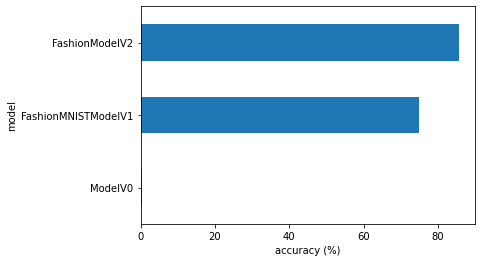

In [46]:
data_frame.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## Make and evaluate random predictions with best model

In [47]:
def make_predictions(
        model: nn.Module,
        data: list,
        device: torch.device = device
):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=1).to(device)
            
            pred_logistic = model(sample)
            pred_prob = torch.softmax(pred_logistic.squeeze(), dim=0)
            
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)

In [48]:
import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=21):
    test_samples.append(sample)
    test_labels.append(label)
    
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [49]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.4820e-05, 3.8358e-07, 1.9494e-06, 2.5906e-07, 1.2526e-07, 9.9549e-01,
         4.4195e-06, 2.5099e-04, 1.0497e-04, 4.1355e-03],
        [1.0973e-01, 2.8295e-01, 9.9585e-04, 5.0051e-01, 4.9567e-03, 3.1283e-03,
         9.6510e-02, 5.5261e-04, 5.6052e-04, 9.9582e-05]])

In [50]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 3, 7, 4, 3, 0, 4, 7, 1, 9, 7, 2, 0, 1, 0, 3, 5, 4, 2, 4, 6])

In [51]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1, 9, 7, 2, 0, 1, 0, 4, 5, 4, 2, 4, 6]

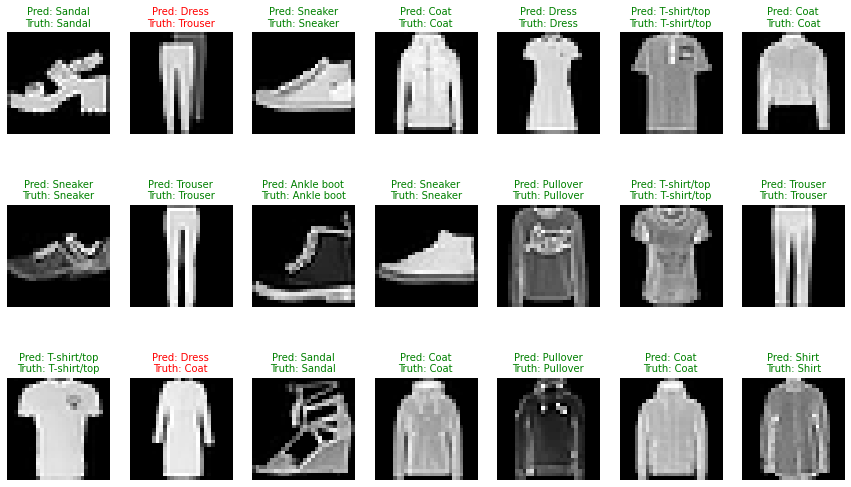

In [52]:
def plot_predictions(test_samples:list[torch.Tensor], pred_labels, truth_labels):
    plt.figure(figsize=[15, 9])
    n_r = 3
    n_c = 7
    # test_samples = test_samples[:9]
    # pred_labels = pred_labels[:9]
    # truth_labels = truth_labels[:9]
    
    for i, sample in enumerate(test_samples):
        plt.subplot(n_r, n_c, i+1)
        
        plt.imshow(sample.squeeze(), cmap='gray')
        
        pred_label = class_names[pred_labels[i]]
        truth_label = class_names[truth_labels[i]]
        
        title_text = f"Pred: {pred_label}\nTruth: {truth_label}"
        
        # Check for equality and change title colour accordingly
        if pred_label == truth_label:
            plt.title(title_text, fontsize=10, c="g") # green text if correct
        else:
            plt.title(title_text, fontsize=10, c="r") # red text if wrong
        plt.axis(False)
        
plot_predictions(test_samples, pred_labels=pred_classes, truth_labels=test_labels)

## Evaluate using confusion matrix

In [53]:
from tqdm.auto import  tqdm

In [59]:
# Make full predictions
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Makeing predictions'):
        X, y = X.to(device), y.to(device)
        
        y_logistic = model_2(X)
        y_probs = torch.softmax(y_logistic, dim=1)
        y_pred = y_probs.argmax(dim=1)
        
        y_preds.append(y_pred.cpu())
        
y_preds = torch.cat(y_preds)
        

Makeing predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [60]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [61]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

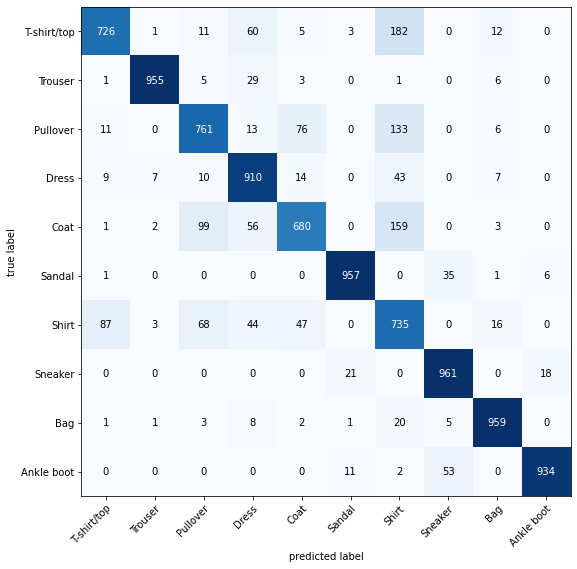

In [62]:
confmat = ConfusionMatrix(num_classes=len(class_names),
                          task='multiclass',)
confmat_tensor = confmat(preds=y_preds, target=test_data.targets)

fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(9, 9)
)

In [63]:
## Save parameters of model
torch.save(model_2.state_dict(), './Parameter/parameter_cnn_model.pth' )

In [70]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionModelV2(input_shape=1, 
                                    hidden_units=10, # try changing this to 128 and seeing what happens 
                                    output_shape=10) 

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f='./Parameter/parameter_cnn_model.pth'))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [73]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn,
    device=device
)

loaded_model_2_results

{'model_name': 'FashionModelV2',
 'model_loss': 3.7354109287261963,
 'model_acc': 11.082268370607029}

In [74]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_result["model_loss"]), 
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(False)

In [75]:
model_2.state_dict()

OrderedDict([('block_2.0.weight',
              tensor([[[[ 2.7365e-02, -8.5292e-02, -6.3809e-02],
                        [ 1.5266e-03,  1.4660e-02,  5.8183e-02],
                        [-7.4064e-02,  3.3593e-02,  5.9883e-02]],
              
                       [[ 5.8535e-02, -9.8185e-02, -4.0226e-02],
                        [-9.0606e-02, -6.6709e-02,  5.8727e-02],
                        [-1.5740e-02,  4.4771e-02, -6.1871e-02]],
              
                       [[ 1.6022e-02, -6.3758e-02,  5.2697e-02],
                        [-4.6104e-02, -2.6432e-02, -9.1456e-02],
                        [ 3.4390e-04,  1.0008e-01,  5.1163e-02]],
              
                       [[-5.7276e-02,  5.4240e-04, -1.2333e-02],
                        [-8.5234e-02,  8.1853e-02,  9.7106e-04],
                        [ 2.1467e-02, -4.3209e-02, -5.0307e-02]],
              
                       [[ 1.6754e-02,  3.8150e-02,  2.2599e-02],
                        [-5.1641e-02,  1.0129e-01, -1.631